# MNIST Digit Classifier

Model taken from [here](https://github.com/ZahraMohit/mnist-digit-classification).

## Required Libraries

In [1]:
import numpy as np # Tensor operations
import matplotlib.pyplot as plt # Used for mathematical purposes
from tensorflow.keras.datasets import mnist # Source of the dataset
from tensorflow.keras.models import Sequential # Imports the Sequential model class from Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Imports the specific layers

## Loading Data

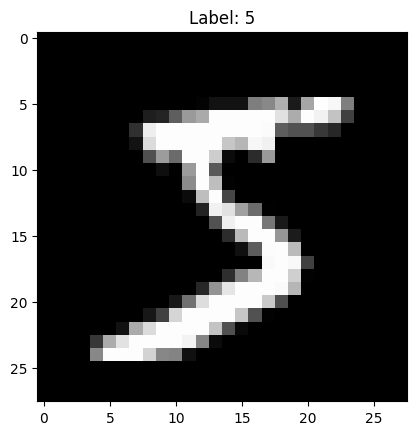

In [4]:
with np.load('mnist.npz') as data: # Loads the datafile
    x_train = data['x_train'] # Extracts the training set images
    y_train = data['y_train'] # Extracts the testing set images
    x_test = data['x_test'] # Extracts the training set labels
    y_test = data['y_test'] # Extracts the training set labels

# Shows an example
plt.imshow(x_train[0], cmap='gray') # Displays the first training setimage
plt.title(f"Label: {y_train[0]}") # Displays the first training set label
plt.show() # Shows the plot

## Normalization

In [5]:
# Normalization
x_train = x_train / 255.0 # Normalizes the training set to get a float point from 0 to 1
x_test = x_test / 255.0 # Normalizes the testing set to get a float point from 0 to 1

# Reshape
x_train = x_train.reshape(-1, 28, 28, 1) # Add channel dimension for grayscale images in training set
x_test = x_test.reshape(-1, 28, 28, 1) # Add channel dimension for grayscale images in test set

In [6]:
# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # First conv layer: 32 filters, 3x3 kernel, ReLU activation
    MaxPooling2D((2,2)), # Max pooling layer: downsample feature maps by 2x2
    Conv2D(64, (3,3), activation='relu'), # Adds a second convolutional layer similar to the first but with 64 filters instead of 32
    MaxPooling2D((2,2)), # Another max pooling layer with 2x2 pool size
    Flatten(), # Flattens the 2D feature maps into a 1D vector
    Dense(128, activation='relu'), # Adds a fully connected (dense) layer with 128 neuron
    Dropout(0.3), # Adds a dropout layer to prevent overfitting
    Dense(10, activation='softmax') # Adds the output layer with 10 neurons, one per digit class (0-9)
])

/Users/henrylee/Projects/digit-classifier/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile
model.compile(optimizer='adam',  # Use Adam optimizer for efficient training
             loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy loss for integer labels
             metrics=['accuracy']) # Track accuracy metric during training
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1) # Train model for 5 epochs with batch size 32, using 10% data for validation

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8816 - loss: 0.3813 - val_accuracy: 0.9845 - val_loss: 0.0531
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9798 - loss: 0.0666 - val_accuracy: 0.9910 - val_loss: 0.0366
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9848 - loss: 0.0457 - val_accuracy: 0.9895 - val_loss: 0.0341
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9918 - val_loss: 0.0309
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9900 - val_loss: 0.0376


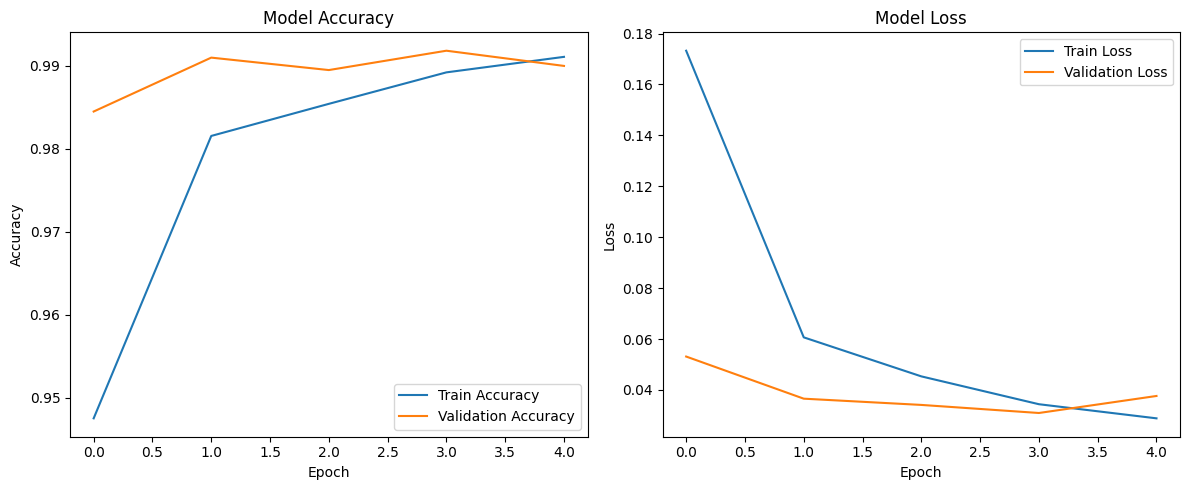

In [8]:
# Accuracy
plt.figure(figsize=(12, 5)) # Creates a new figure 12 by 5
plt.subplot(1, 2, 1) # Splits the figure into a grid of 1 row and 2 columns
plt.plot(history.history['accuracy'], label='Train Accuracy') # Plots the training accuracy recorded at each epoch
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') # Plots the validation accuracy for each epoch
plt.xlabel('Epoch') # Sets the x-label for the first plot
plt.ylabel('Accuracy') # Sets the y-label for the first plot
plt.title('Model Accuracy') # Sets the title for the first plot
plt.legend() # Sets the legend for the first plot

# Loss
plt.subplot(1, 2, 2) # Splits the figure into a grid of 1 row and 2 columns
plt.plot(history.history['loss'], label='Train Loss') # Plots the training loss values recorded at each epoch
plt.plot(history.history['val_loss'], label='Validation Loss') # Plots the validation loss for each epoch
plt.xlabel('Epoch') # Sets the x-label for the second plot
plt.ylabel('Loss') # Sets the y-label for the second plot
plt.title('Model Loss') # Sets the title for the second plot
plt.legend() # Sets the legend for the second plot

plt.tight_layout() # Ensures everything doesn't overlap
plt.show() # Displays the plot

In [9]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test) # Evaluates the model
print(f"Test accuracy: {test_acc:.2f}") # Prints the test accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9850 - loss: 0.0437
Test accuracy: 0.99


In [10]:
# Save Model
model.save("mnist_digit_classifier.keras") # Saves the model